In [110]:
import warnings
import numpy as np 
import pandas as pd
import tensorflow as tf
from matplotlib import rcParams
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = (6,4)

In [111]:
IMG_SIZE = (28,28)

In [135]:
df_test = pd.read_csv('data/fashion-mnist_test.csv')
df_train = pd.read_csv('data/fashion-mnist_train.csv')

print(f'Shape of our test data set is {df_test.shape}')
print(f'Shape of our train data set is {df_train.shape}')

Shape of our test data set is (10000, 785)
Shape of our train data set is (60000, 785)


In [113]:
X_train = df_train.iloc[:, 1:]
X_test = df_test.iloc[:, 1:]
y_train = df_train.iloc[:, 0]
y_test = df_test.iloc[:, 0]

In [114]:
LABELS = {
    0: 'T-shirt/Top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [115]:
def plot_fashion(arr, label):
    img_arrs = np.zeros(shape=(len(arr), 28, 28))
    for i in range(len(arr)):
        img_arrs[i] = np.reshape(arr.iloc[i, :], IMG_SIZE)
    n_cols = 2
    n_rows = (len(arr) + 1) // n_cols
    fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(6, n_rows * 2))
    axes = axes.flatten()
    
    for i in range(len(img_arrs)):
        axes[i].imshow(img_arrs[i], cmap='gray')
        axes[i].set_title(f'{LABELS[label[i]]}')
        axes[i].axis('off')
    
    for j in range(len(img_arrs), len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

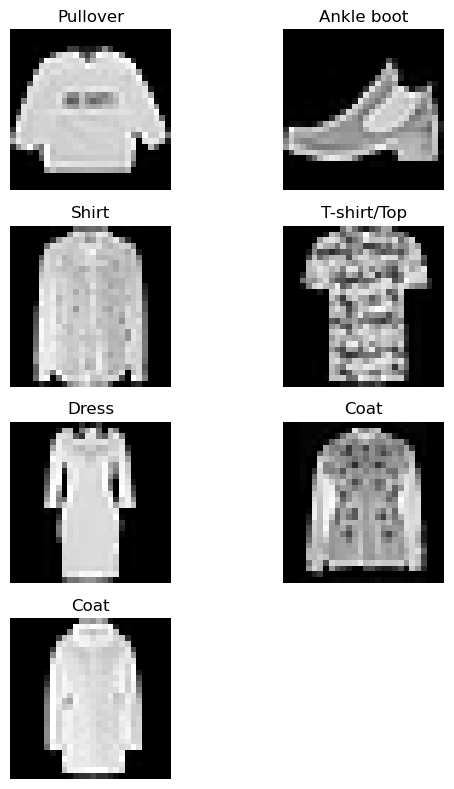

In [116]:
plot_fashion(X_train.iloc[0:7, :], y_train.iloc[0:7])

### Normalizing the train and test data by div to 255

In [117]:
X_train = X_train.to_numpy().astype('float32') / 255
X_test = X_test.to_numpy().astype('float32') / 255

In [118]:
log_reg_model = LogisticRegression()

params_grid = {
    'solver': ['lbfgs', 'liblinear'],
    'C': [0.1, 0.5, 1],
    'penalty': ['l2']
}

grid_search = GridSearchCV(
    log_reg_model,
    params_grid,
    cv=5,
    scoring='accuracy',
    verbose=2
)

sample_size = 20000
grid_search.fit(X_train[0:sample_size, :], y_train[0:sample_size])
log_reg_best = grid_search.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   1.7s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   1.8s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   1.8s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   1.8s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   2.5s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=  13.5s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=  19.5s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=  17.9s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=  16.9s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=  16.1s
[CV] END ....................C=0.5, penalty=l2, solver=lbfgs; total time=   2.5s
[CV] END ....................C=0.5, penalty=l2, s

In [119]:
cv_results = grid_search.cv_results_
cv_results_df = pd.DataFrame(cv_results)
sorted_results = cv_results_df.sort_values(by='mean_test_score', ascending=False)
sorted_results[['params', 'mean_test_score', 'rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.85020,1
2,"{'C': 0.5, 'penalty': 'l2', 'solver': 'lbfgs'}",0.84755,2
4,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.84730,3
3,"{'C': 0.5, 'penalty': 'l2', 'solver': 'libline...",0.84605,4
1,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.84515,5
5,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.84270,6


In [120]:
log_reg_best.fit(X_train, y_train)
y_pred = log_reg_best.predict(X_test)

In [121]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.8579
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1000
           1       0.96      0.97      0.97      1000
           2       0.78      0.76      0.77      1000
           3       0.86      0.88      0.87      1000
           4       0.78      0.81      0.79      1000
           5       0.92      0.92      0.92      1000
           6       0.66      0.61      0.63      1000
           7       0.91      0.91      0.91      1000
           8       0.95      0.95      0.95      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [122]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=4)

In [123]:
X_train = X_train.reshape(-1, 28,28, 1)
X_test = X_test.reshape(-1, 28,28,1)
X_validation = X_validation.reshape(-1, 28,28,1)

In [124]:
print(f'Test data set size is {X_test.shape}')
print(f'Train data set size is {X_train.shape}')
print(f'Validation data set size is {X_validation.shape}')

Test data set size is (10000, 28, 28, 1)
Train data set size is (54000, 28, 28, 1)
Validation data set size is (6000, 28, 28, 1)


In [125]:
cnn_model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28, 1)),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(64, kernel_size=(3,2), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(10, activation='softmax')
    
])

In [126]:
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [127]:
history = cnn_model.fit(X_train, y_train, epochs=20, validation_data=(X_validation, y_validation))

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6725 - loss: 0.8940 - val_accuracy: 0.8375 - val_loss: 0.4424
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8347 - loss: 0.4543 - val_accuracy: 0.8553 - val_loss: 0.3850
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8588 - loss: 0.3879 - val_accuracy: 0.8703 - val_loss: 0.3531
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8764 - loss: 0.3429 - val_accuracy: 0.8855 - val_loss: 0.3176
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8868 - loss: 0.3120 - val_accuracy: 0.8877 - val_loss: 0.3039
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8936 - loss: 0.2911 - val_accuracy: 0.8905 - val_loss: 0.2983
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9033 - loss: 0.2637 - val_accuracy: 0.8892 - val_loss: 0.2965
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9090 - loss: 0

In [128]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print("Test Loss:", round(test_loss,2))
print("Test Accuracy:", round(test_accuracy,2) * 100, '%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9030 - loss: 0.3333
Test Loss: 0.33
Test Accuracy: 90.0 %


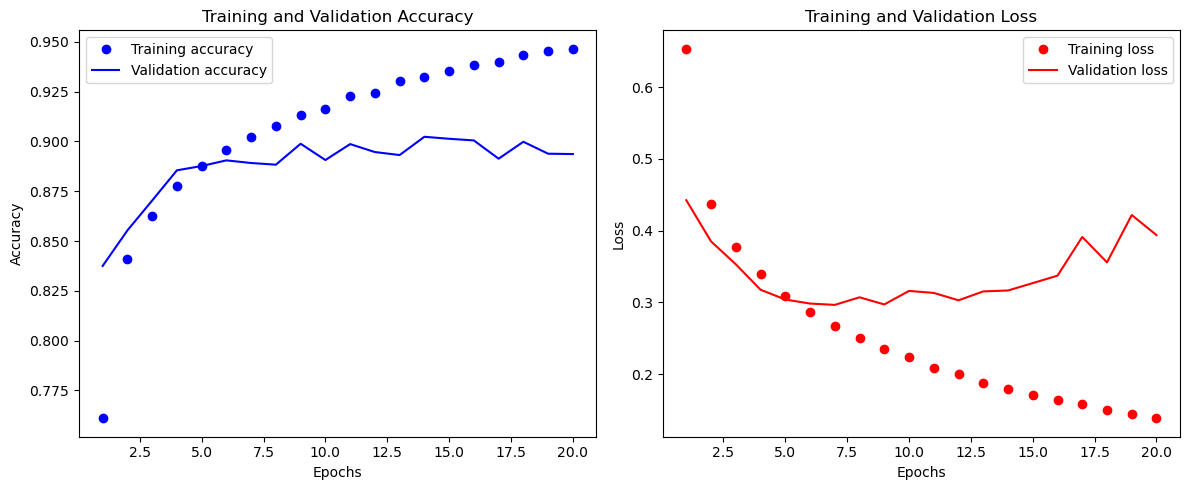

In [129]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'ro', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)


In [130]:
cnn_model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 11, 12, 64)          │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 5, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 3, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 1, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 362,144 (1.38 MB)

 Trainable params: 120,714 (471.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 241,430 (943.09 KB)